<h3>Linear regression</h3>
<p>We start by loading the Olympic 100m men's data</p>

In [2]:
import urllib
urllib.urlretrieve('https://github.com/sdrogers/fcml/raw/master/notebooks/data/olympic100m.txt', 'olympic100m.txt')
import numpy as np
data = np.loadtxt('olympic100m.txt',delimiter=',')
x = data[:,0][:,None]
t = data[:,1][:,None]

<h4>Plotting</h4>
<p>It's useful to start with a plot</p>

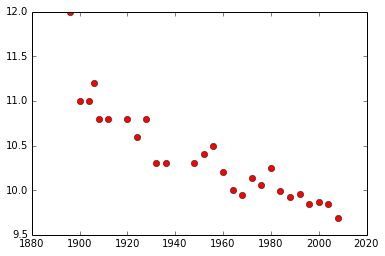

In [3]:
%matplotlib inline
import pylab as plt
plt.plot(x,t,'ro')

<h4>Minismising the loss</h4>
<p>Recall that the total loss was given by:</p>
$$ L = \frac{1}{N}\sum_{n=1}^N (t_n - w_0 - w_1x_n)^2 $$
and the quantities that minimised it by:
$$ w_1 = \frac{\bar{x}\bar{t} - \bar{xt}}{\bar{x}\bar{x} - \bar{x^2}} $$
and
$$ w_0 = \bar{t} - w_1\bar{x} $$
where $\bar{z} = \frac{1}{N}\sum_{n=1}^N z_n$

In [4]:
xbar = x.mean()
tbar = t.mean()
xxbar = np.multiply(x,x).mean()
xtbar = np.multiply(x,t).mean()
print(xbar)
print(tbar)
print(xxbar)
print(xtbar)

1952.37037037
10.3896296296
3812975.55556
20268.0681481


In [5]:
w1 = (tbar*xbar - xtbar)/(xbar*xbar - xxbar)
w0 = tbar-w1*xbar
print(w0)
print(w1)

36.4164559025
-0.013330885711


<h4>Plotting</h4>
<p>We can now plot the fitted model</p>

[[ 1896.        ]
 [ 1897.13131313]
 [ 1898.26262626]
 [ 1899.39393939]
 [ 1900.52525253]
 [ 1901.65656566]
 [ 1902.78787879]
 [ 1903.91919192]
 [ 1905.05050505]
 [ 1906.18181818]
 [ 1907.31313131]
 [ 1908.44444444]
 [ 1909.57575758]
 [ 1910.70707071]
 [ 1911.83838384]
 [ 1912.96969697]
 [ 1914.1010101 ]
 [ 1915.23232323]
 [ 1916.36363636]
 [ 1917.49494949]
 [ 1918.62626263]
 [ 1919.75757576]
 [ 1920.88888889]
 [ 1922.02020202]
 [ 1923.15151515]
 [ 1924.28282828]
 [ 1925.41414141]
 [ 1926.54545455]
 [ 1927.67676768]
 [ 1928.80808081]
 [ 1929.93939394]
 [ 1931.07070707]
 [ 1932.2020202 ]
 [ 1933.33333333]
 [ 1934.46464646]
 [ 1935.5959596 ]
 [ 1936.72727273]
 [ 1937.85858586]
 [ 1938.98989899]
 [ 1940.12121212]
 [ 1941.25252525]
 [ 1942.38383838]
 [ 1943.51515152]
 [ 1944.64646465]
 [ 1945.77777778]
 [ 1946.90909091]
 [ 1948.04040404]
 [ 1949.17171717]
 [ 1950.3030303 ]
 [ 1951.43434343]
 [ 1952.56565657]
 [ 1953.6969697 ]
 [ 1954.82828283]
 [ 1955.95959596]
 [ 1957.09090909]
 [ 1958.22

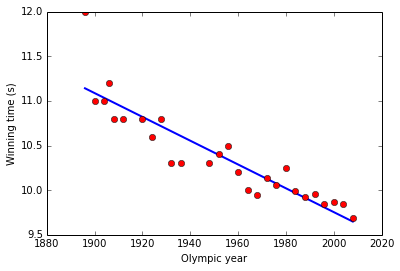

In [8]:
x_test = np.linspace(1896,2008,100)[:,None]
f_test = w0+w1*x_test
print x_test
plt.plot(x_test,f_test,'b-',linewidth=2)
plt.plot(x,t,'ro')
plt.xlabel('Olympic year')
plt.ylabel('Winning time (s)')

<h4>Predictions</h4>
<p>We can now compute the prediction at 2012:</p>

In [6]:
win_2012 = w0+w1*2012
print(win_2012)

9.59471385205


<h4>Matrix and vector form</h4>
<p>We first defined $\mathbf{w},\mathbf{x}_n$ as:</p>
$$ \mathbf{w} = \left[\begin{array}{c} w_0\\w_1\end{array}\right],~~\mathbf{x}_n = \left[\begin{array}{c} 1 \\ x_n \end{array}\right] $$
and:
$$ \mathbf{t} = \left[\begin{array}{c} t_1\\ t_2\\ \vdots\\ t_N \end{array}\right]$$
and:
$$ \mathbf{X} = \left[\begin{array}{c} \mathbf{x}_1^T \\ \mathbf{x}_2^T \\ \vdots \\ \mathbf{x}_N^T \end{array}\right] = \left[ \begin{array}{cc} 1 & x_1 \\ 1 & x_2 \\ \vdots \\ 1 & x_N \end{array}\right] $$
The optimal value of $\mathbf{w}$ is then given by:
$$ \mathbf{w} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t} $$

In [7]:
X = np.hstack((np.ones_like(x),x))
w = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,t))
print(w)

[[  3.64164559e+01]
 [ -1.33308857e-02]]


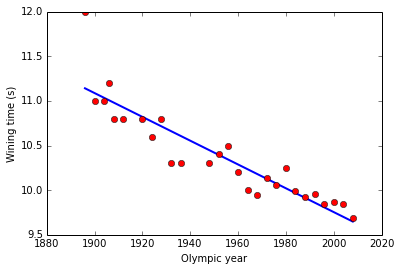

In [8]:
f_test = w[0]+w[1]*x_test
plt.plot(x_test,f_test,'b-',linewidth=2)
plt.plot(x,t,'ro')
plt.xlabel('Olympic year')
plt.ylabel('Wining time (s)')

<h4>Solving linear systems</h4>
<p>To obtaim the optimal value of $\mathbf{w}$ we re-arranged:
$$ \mathbf{X}^T\mathbf{X}\mathbf{w} = \mathbf{X}^T\mathbf{t} $$
It is actually more efficient to solve this equation than explicitly inverting $\mathbf{X}^T\mathbf{X}$.</p>
<p>To do this we can use `numpy.linalg.solve` which solves equations of the form $\mathbf{A}\mathbf{z} = \mathbf{B}$ for $\mathbf{z}$.</p>

In [9]:
w = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,t))
print(w)

[[  3.64164559e+01]
 [ -1.33308857e-02]]


<h4>Predicting in vector and matrix notation</h4>
<p>If we construct a test $\mathbf{X}$ object in the same format as $\mathbf{X}$ (we'll call it $\mathbf{X}_{*}$), we can obtain predictions via $\mathbf{X}^*\mathbf{w}$.

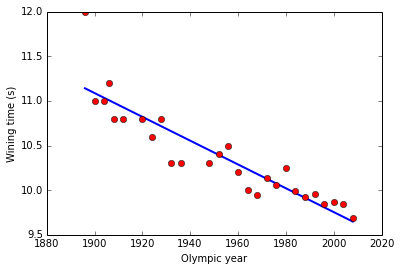

In [10]:
X_test = np.hstack((np.ones_like(x_test),x_test))
f_test = np.dot(X_test,w)
plt.plot(x_test,f_test,'b-',linewidth=2)
plt.plot(x,t,'ro')
plt.xlabel('Olympic year')
plt.ylabel('Wining time (s)')

<p>Or we can make an $\mathbf{x}_{2012}$ object as:
$$ \mathbf{x}_{2012} = \left[\begin{array}{c} 1 \\ 2012 \end{array}\right] $$
and compute the prediction at 2012 as $\mathbf{w}^T\mathbf{x}_{2012}$.</p>

In [11]:
x_2012 = np.zeros(shape=(2,1))
x_2012[0] = 1
x_2012[1] = 2012
f_2012 = np.dot(w.T,x_2012)
print(f_2012)

[[ 9.59471385]]
